In [1]:
import pandas as pd
df = pd.read_pickle('DATA/Dataset/wikiart_full_combined_no_artist.pkl')


In [2]:
import torch
IR_metrics = torch.load('trained_models/TripletResNet_text_features_posrandom_negrandom_100_margin10/IR_metrics/metrics_val.pth')
IR_metrics.keys()

dict_keys(['retrieved_indexes', 'precision_at_k_artist', 'mrr_artist', 'precision_at_k_artist_second_degree', 'mrr_artist_second_degree', 'precisions_dict_result', 'precisions_dict_result_second_degree'])

In [4]:
IR_metrics['precision_at_k_artist']

{'adriaen-brouwer': 0.042857142857142864,
 'adriaen-van-ostade': 0.13999999999999999,
 'albrecht-durer': 0.06344086021505375,
 'alfred-sisley': 0.34750000000000003,
 'alphonse-mucha': 0.0,
 'amedeo-modigliani': 0.5595238095238095,
 'anders-zorn': 0.1,
 'andrea-mantegna': 0.0,
 'andy-warhol': 0.037500000000000006,
 'anna-ostroumova-lebedeva': 0.018181818181818184,
 'annibale-carracci': 0.0,
 'anthony-van-dyck': 0.09090909090909091,
 'arshile-gorky': 0.225,
 'aubrey-beardsley': 0.29000000000000004,
 'auguste-rodin': 0.0,
 'bartolome-esteban-murillo': 0.37,
 'berthe-morisot': 0.10833333333333334,
 'boris-kustodiev': 0.21617647058823528,
 'camille-corot': 0.19814814814814813,
 'camille-pissarro': 0.38641975308641974,
 'caravaggio': 0.03333333333333333,
 'chaim-soutine': 0.05000000000000001,
 'charles-francois-daubigny': 0.48999999999999994,
 'childe-hassam': 0.09629629629629628,
 'claude-monet': 0.38828125,
 'david-burliuk': 0.3742857142857143,
 'diego-velazquez': 0.11250000000000002,
 'ed

In [3]:
import numpy as np
print(f'Precision at k10 for artist: {np.mean(list(IR_metrics['precision_at_k_artist'].values()))}, MRR for artist: {np.mean(list(IR_metrics['mrr_artist'].values()))}')
print(f'Precision at k10 for second degree artist: {np.mean(list(IR_metrics['precision_at_k_artist_second_degree'].values()))}, MRR for second degree artist: {np.mean(list(IR_metrics['mrr_artist_second_degree'].values()))}')
# print('Precision at different k:', {inner_key: sum(d[inner_key] for d in precisions_dict_result.values()) / len(precisions_dict_result) for inner_key in precisions_dict_result[next(iter(precisions_dict_result))].keys()})
# print('Precision at different k for second degree:', {inner_key: sum(d[inner_key] for d in precisions_dict_result_second_degree.values()) / len(precisions_dict_result_second_degree) for inner_key in precisions_dict_result_second_degree[next(iter(precisions_dict_result_second_degree))].keys()})
print('---------------------------------------')
print('                                       ')

SyntaxError: f-string: unmatched '[' (896951749.py, line 2)

In [13]:
from matplotlib import pyplot as plt
from PIL import Image
general_image_path = '/home/tliberatore2/Reproduction-of-ArtSAGENet/wikiart/'
def plot_examples(query, positive_indexes, df):
    plt.imshow(Image.open(general_image_path+df.loc[query].relative_path))
    plt.title(str(df.loc[query].artist_name+ 'influencers:'+str(df.loc[query].influenced_by)))
    fig, axes = plt.subplots(1, 10, figsize=(20, 10))
    for i, ax in enumerate(axes):
        #ax.imshow(Image.open('wikiart/'+df.iloc[query].relative_path))
        image_path = general_image_path+df.iloc[positive_indexes[i]].relative_path
        image =  Image.open(image_path)
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(df.iloc[positive_indexes[i]].artist_name)
    plt.show()

In [49]:
import json
with open('DATA/influenced_by_dict.json', 'r') as f:
  influence_dict = json.load(f)
influence_dict['vincent-van-gogh']


['jean-baptiste-simeon-chardin',
 'katsushika-hokusai',
 'peter-paul-rubens',
 'paul-cezanne',
 'luke-fildes',
 'hugo-van-der-goes',
 'alfred-sisley',
 'anton-mauve',
 'willem-roelofs',
 'jacob-van-ruisdael',
 'rembrandt',
 'jean-francois-millet',
 'paul-gauguin']

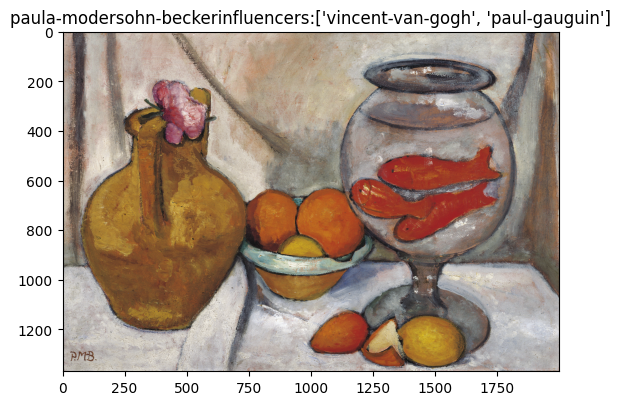

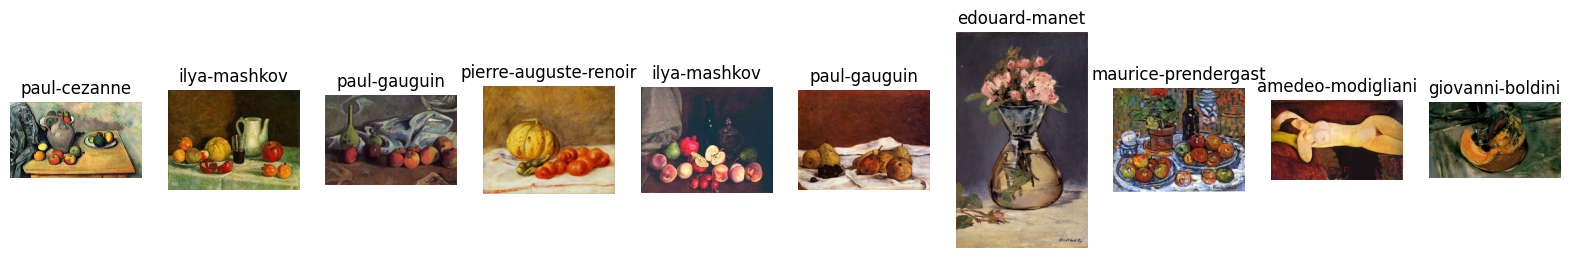

In [70]:
plot_examples(5,IR_metrics['baseline_image_features']['retrieved_indexes'][5], df[df['mode'] == 'val'].reset_index(drop=True) )

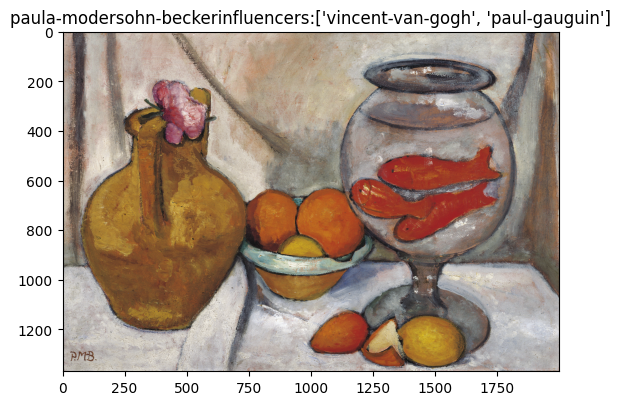

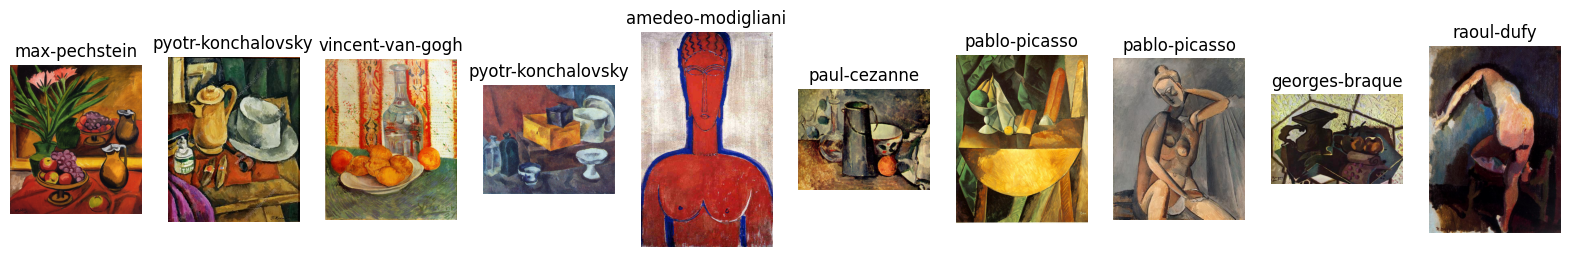

In [76]:
plot_examples(5,IR_metrics['trained_models/TripletResNet_image_features_posfaiss_negrandom']['retrieved_indexes'][5], df[df['mode'] == 'val'].reset_index(drop=True) )

In [20]:
from matplotlib import pyplot as plt
from PIL import Image
general_image_path = '/home/tliberatore2/Reproduction-of-ArtSAGENet/wikiart/'
def plot_examples_pos_neg(query,positive_indexes, negative_indexes, df,general_image_path ):
    plt.imshow(Image.open(general_image_path+df.loc[query].relative_path))
    plt.title(str(df.loc[query].artist_name+ ' influencers:'+str(df.loc[query].influenced_by)))
    fig, axes = plt.subplots(2, 10, figsize=(20, 10))
    for i, (ax_pos, ax_neg) in enumerate(zip(axes[0], axes[1])):
        if i < len(positive_indexes):
            image_path_pos = general_image_path + df.iloc[positive_indexes[i]].relative_path
            image_pos = Image.open(image_path_pos)
            ax_pos.imshow(image_pos)
            ax_pos.axis('off')
            ax_pos.set_title(df.iloc[positive_indexes[i]].artist_name)
        
        if i < len(negative_indexes):
            image_path_neg = general_image_path + df.iloc[negative_indexes[i]].relative_path
            image_neg = Image.open(image_path_neg)
            ax_neg.imshow(image_neg)
            ax_neg.axis('off')
            ax_neg.set_title(df.iloc[negative_indexes[i]].artist_name)
    plt.show()

In [19]:
import matplotlib.pyplot as plt
from PIL import Image

def plot_examples_pos_neg(query, positive_indexes, negative_indexes, df, general_image_path):
    plt.imshow(Image.open(general_image_path + df.loc[query].relative_path))
    plt.title(str(df.loc[query].artist_name + ' influencers: ' + str(df.loc[query].influenced_by)))
    fig, (ax_pos, ax_neg) = plt.subplots(1, 2, figsize=(15, 7))
    
    for i, idx in enumerate(positive_indexes):
        if i < len(positive_indexes):
            image_path_pos = general_image_path + df.iloc[idx].relative_path
            image_pos = Image.open(image_path_pos)
            ax_pos.imshow(image_pos)
            ax_pos.axis('off')
            ax_pos.set_title(df.iloc[idx].artist_name)

    for i, idx in enumerate(negative_indexes):
        if i < len(negative_indexes):
            image_path_neg = general_image_path + df.iloc[idx].relative_path
            image_neg = Image.open(image_path_neg)
            ax_neg.imshow(image_neg)
            ax_neg.axis('off')
            ax_neg.set_title(df.iloc[idx].artist_name)

    plt.show()


In [36]:
import matplotlib.pyplot as plt
from PIL import Image

def plot_examples(query, positive_indexes, negative_indexes, df, general_image_path):
    plt.imshow(Image.open(general_image_path + df.loc[query].relative_path))
    plt.title(str(df.loc[query].artist_name + ' influencers: ' + str(df.loc[query].influenced_by)))
    
    fig, axes = plt.subplots(max(len(positive_indexes), len(negative_indexes)), 2, figsize=(30, 10))
    
    for i, idx in enumerate(positive_indexes):
        image_path_pos = general_image_path + df.iloc[idx].relative_path
        image_pos = Image.open(image_path_pos)
        axes[i, 0].imshow(image_pos)
        axes[i, 0].axis('off')
        axes[i, 0].set_title(df.iloc[idx].artist_name)

    for i, idx in enumerate(negative_indexes):
        image_path_neg = general_image_path + df.iloc[idx].relative_path
        image_neg = Image.open(image_path_neg)
        axes[i, 1].imshow(image_neg)
        axes[i, 1].axis('off')
        axes[i, 1].set_title(df.iloc[idx].artist_name)
    plt.subplots_adjust(wspace=0.001)
    plt.show()


DATA/Dataset_toload/val_dataset_image_features_posrandom_negrandom_10.pt


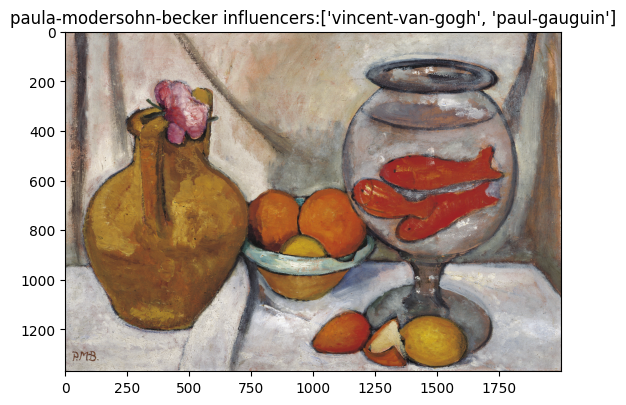

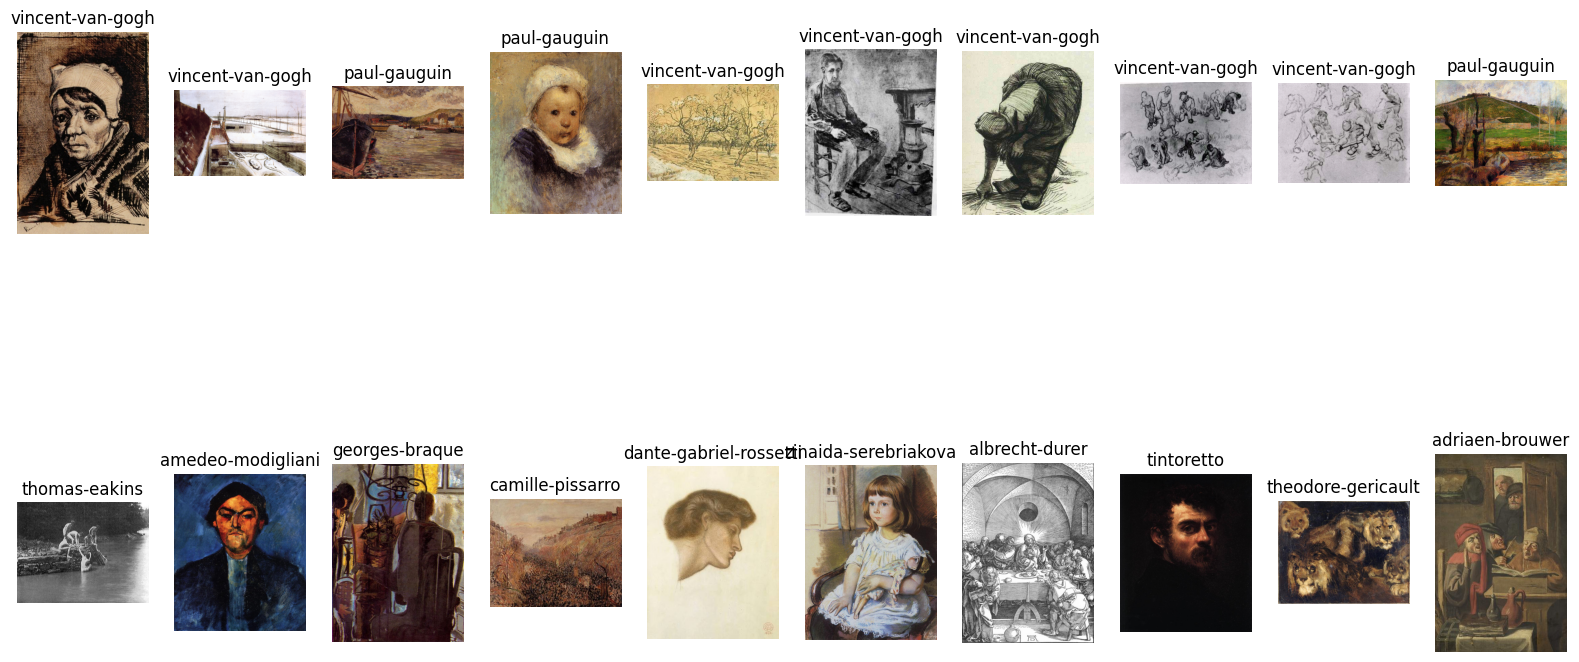

In [26]:
import torch
from create_data_loader import TripletLossDataset_features
import glob
data_paths = glob.glob('DATA/Dataset_toload/*', recursive = True)
data_paths = ['DATA/Dataset_toload/val_dataset_image_features_posrandom_negrandom_10.pt']
for path in data_paths:
    print(path)
    dataset_train = torch.load(path)
    positive_ex = dataset_train.positive_examples[5]
    negatives_ex = dataset_train.negative_examples[5]
    plot_examples_pos_neg(5, positive_ex,negatives_ex, df[df['mode'] == 'val'].reset_index(drop=True),general_image_path = '/home/tliberatore2/Reproduction-of-ArtSAGENet/wikiart/')
    



In [39]:
from Triplet_Network import TripletResNet_features
feature = 'image_text_features'
model_path = 'trained_models/TripletResNet_image_text_features_posrandom_negrandom/model.pth'
model = TripletResNet_features(df.loc[0,feature].shape[0])
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
model.eval()
df[f'trained_{feature}'] = df[feature].apply(lambda x: model.forward_once(x).detach())

In [48]:
df = pd.read_pickle('DATA/Dataset/wikiart_full_combined_try.pkl')
influence_dict =  df.groupby('artist_name')['influenced_by'].first().to_dict()

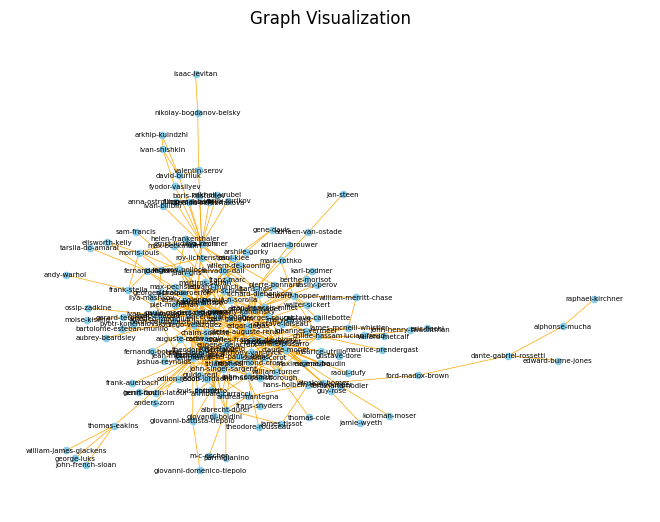

In [51]:
#https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial17/SimCLR.html
import pandas as pd
import numpy as np
import torch
import json
def filter_dict_by_keys(input_dict, key_list):
    filtered_dict = {key: value for key, value in input_dict.items() if key in key_list}
    return filtered_dict

def read_json_file(file_path):
    with open(file_path, 'r') as file:
        graph_dict = json.load(file)
    return graph_dict

import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(graph_dict):
    G = nx.from_dict_of_lists(graph_dict)
    nx.draw(G, with_labels=True, node_size=20, node_color='skyblue', font_size=5, edge_color='orange', width=0.5)
    plt.title("Graph Visualization")
    plt.show()

def draw_directed_graph(graph_dict):
    G = nx.DiGraph()
    for node, edges in graph_dict.items():
        for edge in edges:
            G.add_edge(node, edge)
    pos = nx.planar_layout(G)
    nx.draw(G,pos, with_labels=True, node_size=20, node_color='skyblue', font_size=8, arrowsize=10, edge_color='orange', width=0.5)
    plt.title("Directed Graph Visualization")
    plt.show()
    plt.savefig('plot_influence.png')

df = pd.read_pickle('DATA/Dataset/wikiart_full_combined_try.pkl')
influence_dict =  df.groupby('artist_name')['influenced_by'].first().to_dict()
artist_freq = df.artist_name.value_counts()
artist_freq = artist_freq#[artist_freq > 1000]
artist_freq_more = list(artist_freq.keys())
painters_influence_dict = filter_dict_by_keys(input_dict=influence_dict, key_list=artist_freq_more)
visualize_graph(painters_influence_dict)


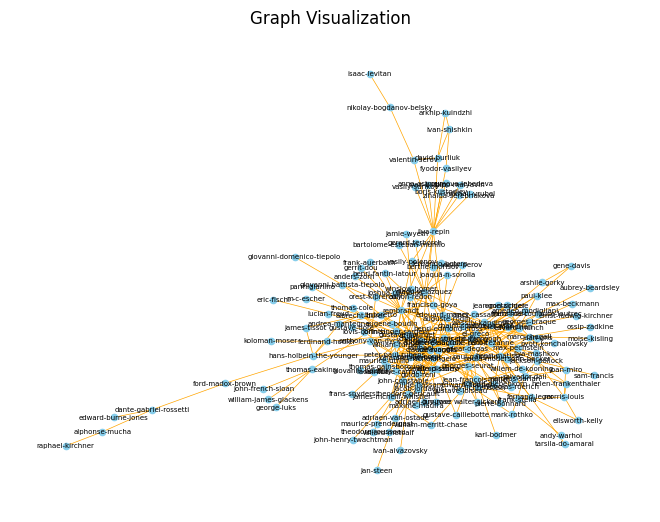

In [50]:
artist_freq = df.artist_name.value_counts()
artist_freq = artist_freq#[artist_freq > 1000]
artist_freq_more = list(artist_freq.keys())
painters_influence_dict = filter_dict_by_keys(input_dict=influence_dict, key_list=artist_freq_more)
visualize_graph(painters_influence_dict)
#draw_directed_graph(painters_influence_dict)